DIVYA ANANDAN (AM.EN.U4CSE22058)- FDS PROJECT

CREATING SYNTHETIC DATA USING FAKER

In [44]:
pip install faker pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker
fake = Faker()

# Number of records
num_records = 2000

# Helper functions
def generate_stress_level():
    return round(random.uniform(1, 10), 1)  # Stress level on a scale of 1-10


def generate_sleep_hours():
    return random.choice([round(random.uniform(4, 9), 1), None])  # Missing values introduced


def generate_work_hours():
    return random.choice([random.randint(30, 80), None])  # Missing and outliers


# Data generation
data = {
    "Employee ID": [fake.uuid4() for _ in range(num_records)],
    "Age": [random.choice([random.randint(21, 60), None]) for _ in range(num_records)],  # Include missing values
    "Gender": [random.choice(["Male", "Female", "Other"]) for _ in range(num_records)],
    "Work Hours per Week": [generate_work_hours() for _ in range(num_records)],
    "Job Role": [random.choice(["Developer", "Manager", "Tester", "Analyst"]) for _ in range(num_records)],
    "Counseling Available": [random.choice(["Yes", "No"]) for _ in range(num_records)],
    "Work-From-Home Days": [random.randint(0, 5) for _ in range(num_records)],
    "Stress Level (1-10)": [generate_stress_level() for _ in range(num_records)],
    "Physical Activity (Hours)": [random.randint(0, 10) for _ in range(num_records)],
    "Supportive Policies": [random.randint(0, 5) for _ in range(num_records)],
    "Sleep Hours": [generate_sleep_hours() for _ in range(num_records)],
    "Work-Life Balance Score": [round(random.uniform(1, 10), 1) for _ in range(num_records)],
    "Sick Leaves (Last Year)": [random.randint(0, 15) for _ in range(num_records)],
    "Recreational Activities": [random.choice(["Yes", "No"]) for _ in range(num_records)],
    "Productivity Score": [round(random.uniform(1, 10), 1) for _ in range(num_records)],
    "Mental Health Condition": [random.choice(["No Issue", "Moderate Issue", "Severe Issue"]) for _ in range(num_records)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Introduce duplicates (5% of the dataset)
num_duplicates = int(0.05 * num_records)
duplicates = df.sample(num_duplicates, random_state=42)
df = pd.concat([df, duplicates])

# Add outliers to specific columns
outlier_indices = random.sample(range(len(df)), int(0.02 * len(df)))  # 2% of data as outliers

for i in outlier_indices:
    df.loc[i, "Work Hours per Week"] = random.choice([100, 120, 150])  # Extreme work hours
    df.loc[i, "Stress Level (1-10)"] = random.choice([11, 12, 15])  # Stress level above scale
    df.loc[i, "Sleep Hours"] = random.choice([1, 2])  # Very low sleep hours

# Save synthetic dataset with outliers
df.to_csv("C:/Users/asus/Downloads/synthetic_mental_health_data.csv", index=False)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2102 entries, 0 to 2083
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee ID                2100 non-null   object 
 1   Age                        1049 non-null   float64
 2   Gender                     2100 non-null   object 
 3   Work Hours per Week        1096 non-null   float64
 4   Job Role                   2100 non-null   object 
 5   Counseling Available       2100 non-null   object 
 6   Work-From-Home Days        2100 non-null   float64
 7   Stress Level (1-10)        2102 non-null   float64
 8   Physical Activity (Hours)  2100 non-null   float64
 9   Supportive Policies        2100 non-null   float64
 10  Sleep Hours                1073 non-null   float64
 11  Work-Life Balance Score    2100 non-null   float64
 12  Sick Leaves (Last Year)    2100 non-null   float64
 13  Recreational Activities    2100 non-null   object 
 1

In [47]:
df.head()

,Employee ID,Age,Gender,Work Hours per Week,Job Role,Counseling Available,Work-From-Home Days,Stress Level (1-10),Physical Activity (Hours),Supportive Policies,Sleep Hours,Work-Life Balance Score,Sick Leaves (Last Year),Recreational Activities,Productivity Score,Mental Health Condition
0,c5282d35-f154-4699-aa5e-8e8a55775fd7,NaN,Male,120.0,Tester,No,1.0,11.0,1.0,2.0,1.0,2.9,7.0,Yes,1.2,Moderate Issue
1,4f0e9c1b-55ab-437e-afe6-0b549da0ddca,45.0,Male,NaN,Tester,Yes,2.0,9.8,1.0,3.0,NaN,2.5,1.0,Yes,8.7,No Issue
2,f1e9dece-a6af-4f58-83da-565bef825a73,NaN,Male,NaN,Analyst,Yes,4.0,9.0,1.0,4.0,NaN,8.8,10.0,Yes,3.7,Severe Issue
3,a7aad9cd-38af-4ada-8de8-6b82917299bc,NaN,Other,NaN,Manager,Yes,1.0,1.0,10.0,5.0,4.6,5.7,3.0,No,1.1,Severe Issue
4,6a216353-a88e-4c20-9385-e05314ca35ae,42.0,Male,NaN,Manager,Yes,5.0,8.4,1.0,5.0,NaN,2.3,4.0,No,8.4,Severe Issue


In [48]:
df.shape

(2102, 16)

VISUALISATION OF DATA BEFORE PREPROCESSING 

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [50]:
# Load the dataset
df = pd.read_csv("C:/Users/asus/Downloads/synthetic_mental_health_data.csv")
df.head()

,Employee ID,Age,Gender,Work Hours per Week,Job Role,Counseling Available,Work-From-Home Days,Stress Level (1-10),Physical Activity (Hours),Supportive Policies,Sleep Hours,Work-Life Balance Score,Sick Leaves (Last Year),Recreational Activities,Productivity Score,Mental Health Condition
0,c5282d35-f154-4699-aa5e-8e8a55775fd7,NaN,Male,120.0,Tester,No,1.0,11.0,1.0,2.0,1.0,2.9,7.0,Yes,1.2,Moderate Issue
1,4f0e9c1b-55ab-437e-afe6-0b549da0ddca,45.0,Male,NaN,Tester,Yes,2.0,9.8,1.0,3.0,NaN,2.5,1.0,Yes,8.7,No Issue
2,f1e9dece-a6af-4f58-83da-565bef825a73,NaN,Male,NaN,Analyst,Yes,4.0,9.0,1.0,4.0,NaN,8.8,10.0,Yes,3.7,Severe Issue
3,a7aad9cd-38af-4ada-8de8-6b82917299bc,NaN,Other,NaN,Manager,Yes,1.0,1.0,10.0,5.0,4.6,5.7,3.0,No,1.1,Severe Issue
4,6a216353-a88e-4c20-9385-e05314ca35ae,42.0,Male,NaN,Manager,Yes,5.0,8.4,1.0,5.0,NaN,2.3,4.0,No,8.4,Severe Issue


<Figure size 400x600 with 0 Axes>

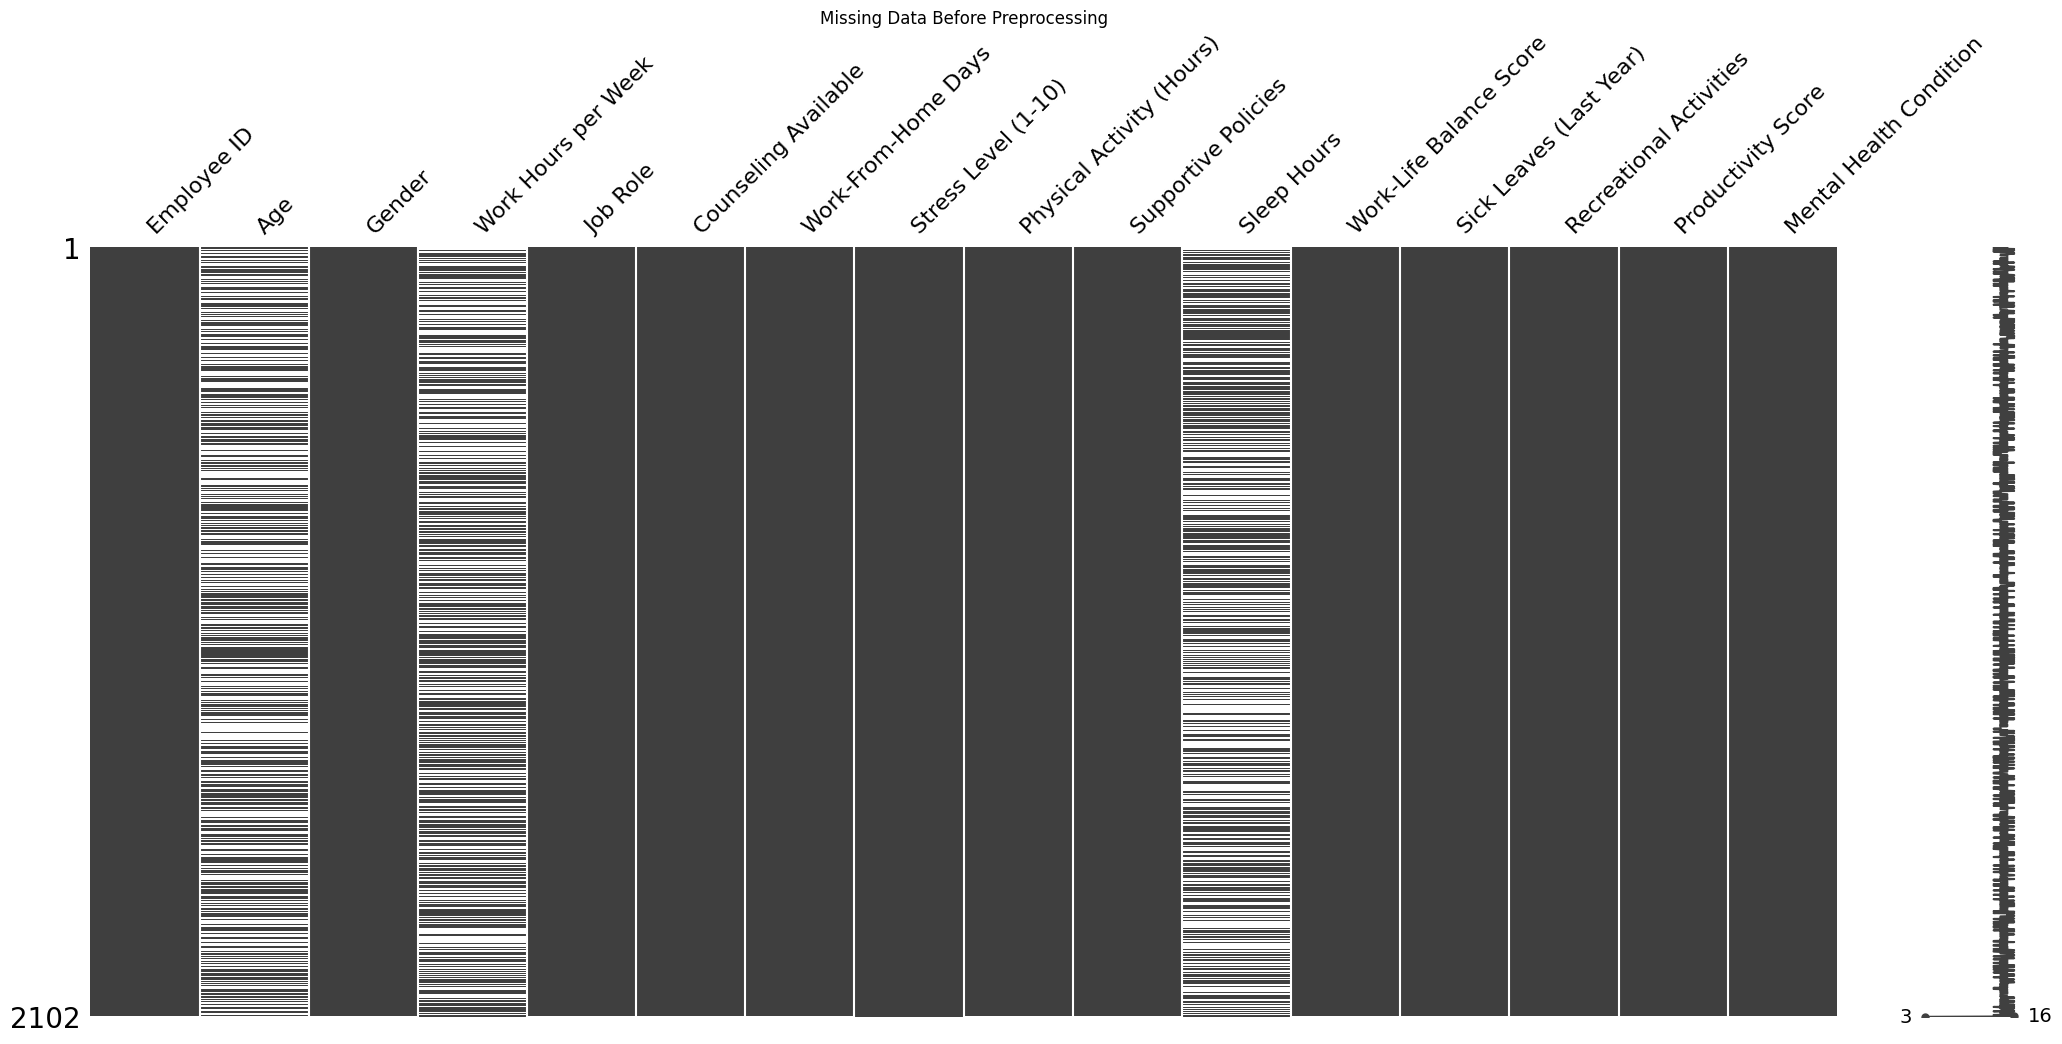

In [51]:
# Visualize missing values before preprocessing
plt.figure(figsize=(4, 6))
msno.matrix(df)
plt.title("Missing Data Before Preprocessing")
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_21648\453113639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Mental Health Condition", data=df, palette="viridis")


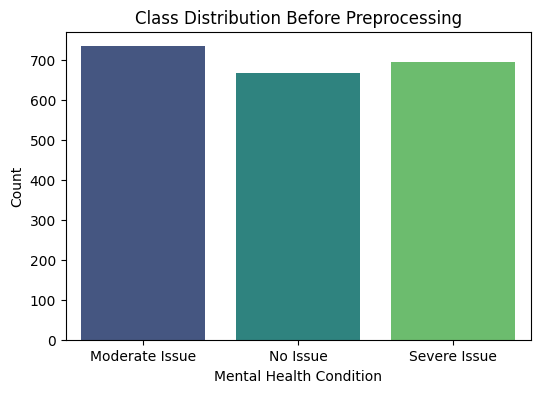

In [52]:
# Visualizing the class distribution (target variable) before preprocessing
plt.figure(figsize=(6, 4))
sns.countplot(x="Mental Health Condition", data=df, palette="viridis")
plt.title("Class Distribution Before Preprocessing")
plt.xlabel("Mental Health Condition")
plt.ylabel("Count")
plt.show()

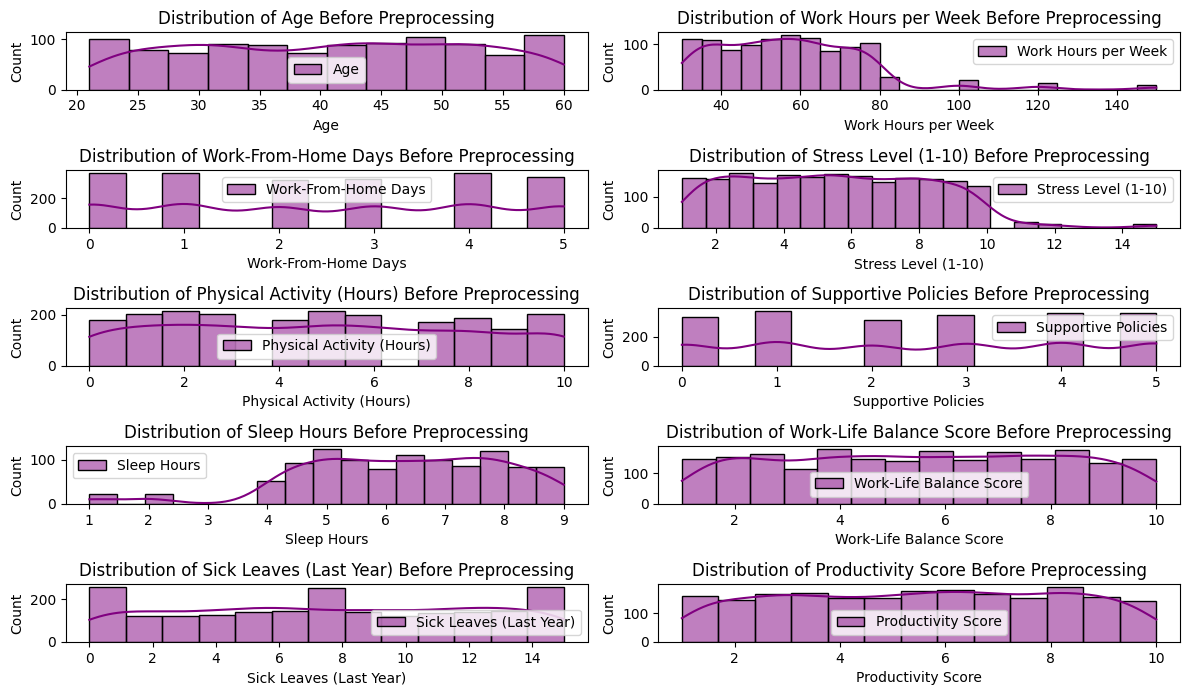

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Example: df = pd.read_csv('your_dataset.csv')

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Loop through numeric columns and plot their distribution
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i)  # Arrange the subplots
    sns.histplot(df[col], kde=True, color="purple", label=col)
    plt.title(f"Distribution of {col} Before Preprocessing")
    plt.legend()

# Adjust the layout to make it neat
plt.tight_layout()
plt.show()



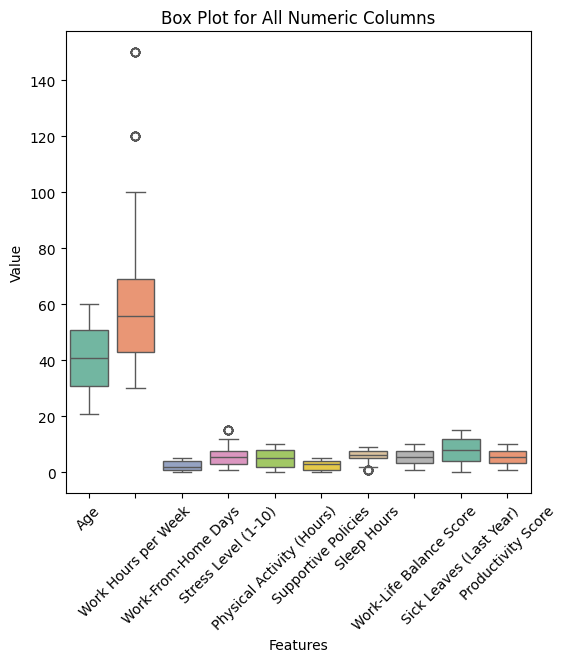

In [54]:

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns

# Create the box plot for all numeric columns
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[numeric_cols], palette='Set2')

# Customize the plot
plt.title('Box Plot for All Numeric Columns')
plt.xticks(rotation=45)  # Rotate column names for better readability
plt.xlabel('Features')
plt.ylabel('Value')

# Show the plot
plt.show()



                                Age  Work Hours per Week  Work-From-Home Days  \
Age                        1.000000             0.009625             0.015183   
Work Hours per Week        0.009625             1.000000             0.051915   
Work-From-Home Days        0.015183             0.051915             1.000000   
Stress Level (1-10)       -0.017298             0.305721            -0.001841   
Physical Activity (Hours)  0.032417             0.013787             0.012101   
Supportive Policies       -0.049046             0.031708             0.006931   
Sleep Hours                0.014379            -0.493537            -0.038289   
Work-Life Balance Score    0.052090            -0.031490            -0.003271   
Sick Leaves (Last Year)    0.023893             0.037222            -0.021553   
Productivity Score        -0.011034            -0.017238            -0.057221   

                           Stress Level (1-10)  Physical Activity (Hours)  \
Age                            

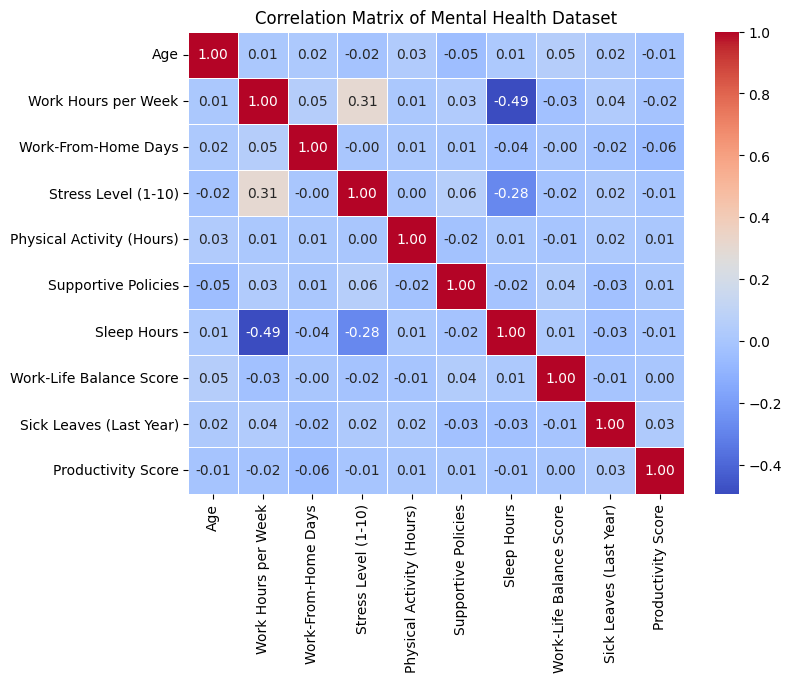

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)

# 2. Print Correlation Matrix
print(correlation_matrix)

# 3. Visualize Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Mental Health Dataset')
plt.show()

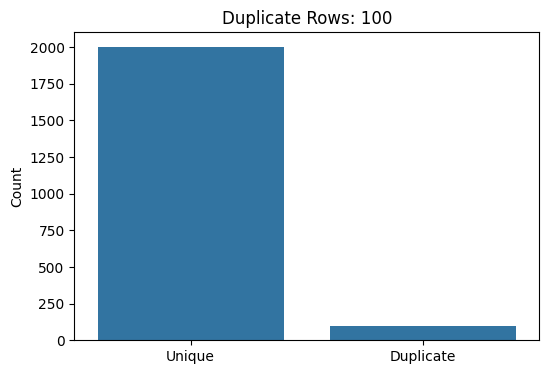

In [56]:
# Count duplicates
num_duplicates = df.duplicated().sum()

# Bar Plot for Duplicates
plt.figure(figsize=(6, 4))
sns.barplot(x=['Unique', 'Duplicate'], y=[df.shape[0] - num_duplicates, num_duplicates])
plt.title(f"Duplicate Rows: {num_duplicates}")
plt.ylabel("Count")
plt.show()

In [57]:
# Print counts
print("Missing Values per Column:\n", df.isnull().sum())
print("\nTotal Duplicate Rows: ", df.duplicated().sum())

Missing Values per Column:
 Employee ID                     2
Age                          1053
Gender                          2
Work Hours per Week          1006
Job Role                        2
Counseling Available            2
Work-From-Home Days             2
Stress Level (1-10)             0
Physical Activity (Hours)       2
Supportive Policies             2
Sleep Hours                  1029
Work-Life Balance Score         2
Sick Leaves (Last Year)         2
Recreational Activities         2
Productivity Score              2
Mental Health Condition         2
dtype: int64

Total Duplicate Rows:  100


PREPROCESSING THE DATA

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee ID                2100 non-null   object 
 1   Age                        1049 non-null   float64
 2   Gender                     2100 non-null   object 
 3   Work Hours per Week        1096 non-null   float64
 4   Job Role                   2100 non-null   object 
 5   Counseling Available       2100 non-null   object 
 6   Work-From-Home Days        2100 non-null   float64
 7   Stress Level (1-10)        2102 non-null   float64
 8   Physical Activity (Hours)  2100 non-null   float64
 9   Supportive Policies        2100 non-null   float64
 10  Sleep Hours                1073 non-null   float64
 11  Work-Life Balance Score    2100 non-null   float64
 12  Sick Leaves (Last Year)    2100 non-null   float64
 13  Recreational Activities    2100 non-null   objec

In [59]:
from sklearn.impute import SimpleImputer

# Define imputer for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')

# Select numeric columns only
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Impute numeric columns
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Handle categorical columns separately
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [60]:
# Encoding 'Gender' using Label Encoding
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

# Encoding 'Job Role' using One-Hot Encoding
if 'Job Role' in df.columns:
    df = pd.get_dummies(df, columns=['Job Role'], prefix='Job Role')

# Encoding 'Counseling Available' using Label Encoding
df['Counseling Available'] = df['Counseling Available'].map({'Yes': 1, 'No': 0})

# Encoding 'Recreational Activities' using Label Encoding
df['Recreational Activities'] = df['Recreational Activities'].map({'Yes': 1, 'No': 0})

# Encoding 'Mental Health Condition' as ordinal
df['Mental Health Condition'] = df['Mental Health Condition'].map({
    'Severe Issue': 2,
    'Moderate Issue': 1,
    'No Issue': 0
})

# Display a sample of the transformed data
print("\nEncoded Data:")
print(df.head())

# Save the encoded dataset to a new file
df.to_csv("encoded_mental_health_data.csv", index=False)


Encoded Data:
                            Employee ID        Age  Gender  \
0  c5282d35-f154-4699-aa5e-8e8a55775fd7  40.781697       0   
1  4f0e9c1b-55ab-437e-afe6-0b549da0ddca  45.000000       0   
2  f1e9dece-a6af-4f58-83da-565bef825a73  40.781697       0   
3  a7aad9cd-38af-4ada-8de8-6b82917299bc  40.781697       2   
4  6a216353-a88e-4c20-9385-e05314ca35ae  42.000000       0   

   Work Hours per Week  Counseling Available  Work-From-Home Days  \
0            120.00000                     0                  1.0   
1             57.32573                     1                  2.0   
2             57.32573                     1                  4.0   
3             57.32573                     1                  1.0   
4             57.32573                     1                  5.0   

   Stress Level (1-10)  Physical Activity (Hours)  Supportive Policies  \
0                 11.0                        1.0                  2.0   
1                  9.8                        1.0

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee ID                2102 non-null   object 
 1   Age                        2102 non-null   float64
 2   Gender                     2102 non-null   int64  
 3   Work Hours per Week        2102 non-null   float64
 4   Counseling Available       2102 non-null   int64  
 5   Work-From-Home Days        2102 non-null   float64
 6   Stress Level (1-10)        2102 non-null   float64
 7   Physical Activity (Hours)  2102 non-null   float64
 8   Supportive Policies        2102 non-null   float64
 9   Sleep Hours                2102 non-null   float64
 10  Work-Life Balance Score    2102 non-null   float64
 11  Sick Leaves (Last Year)    2102 non-null   float64
 12  Recreational Activities    2102 non-null   int64  
 13  Productivity Score         2102 non-null   float

In [62]:
# List of boolean columns you want to convert
job_role_columns = ['Job Role_Analyst', 'Job Role_Developer', 'Job Role_Manager', 'Job Role_Tester']

# Convert them to numeric (1 and 0)
df[job_role_columns] = df[job_role_columns].astype(int)


In [63]:
print(df.isnull().sum())

Employee ID                  0
Age                          0
Gender                       0
Work Hours per Week          0
Counseling Available         0
Work-From-Home Days          0
Stress Level (1-10)          0
Physical Activity (Hours)    0
Supportive Policies          0
Sleep Hours                  0
Work-Life Balance Score      0
Sick Leaves (Last Year)      0
Recreational Activities      0
Productivity Score           0
Mental Health Condition      0
Job Role_Analyst             0
Job Role_Developer           0
Job Role_Manager             0
Job Role_Tester              0
dtype: int64


RANDOM FOREST MODEL TRAINING

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop the first column (Employee ID)
df = df.drop(columns=['Employee ID'])

# Define features (X) and target (y)
X = df.drop(columns=['Mental Health Condition'])  # Features (all columns except 'Mental Health Condition')
y = df['Mental Health Condition']  # Target variable (Mental Health Condition)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 6: Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 40.86%

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.34      0.37       143
           1       0.39      0.51      0.45       139
           2       0.42      0.38      0.40       139

    accuracy                           0.41       421
   macro avg       0.41      0.41      0.41       421
weighted avg       0.41      0.41      0.41       421



VISUALISATION OF MODEL BEFORE PREPROCESSING

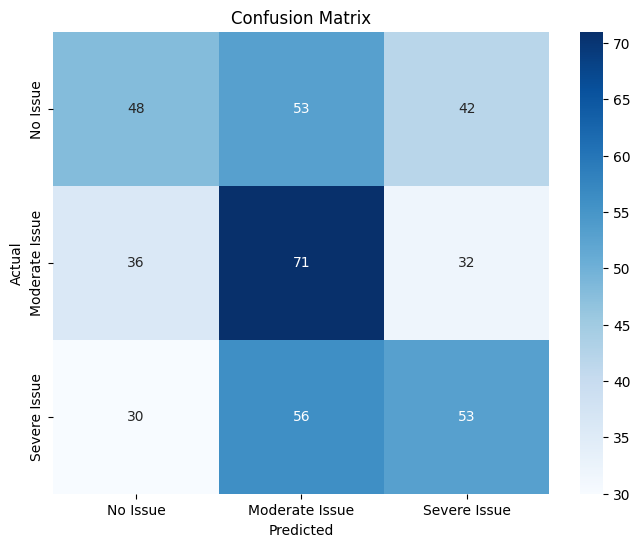

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Issue', 'Moderate Issue', 'Severe Issue'], yticklabels=['No Issue', 'Moderate Issue', 'Severe Issue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


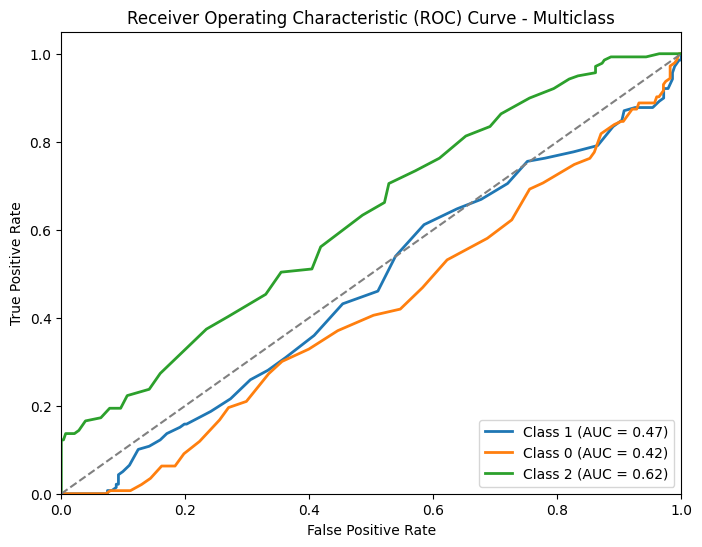

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

y_test_bin = label_binarize(y_test, classes=df['Mental Health Condition'].unique())
y_pred_prob = rf.predict_proba(X_test)

# Compute ROC curve and AUC for each class
n_classes = y_test_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {df["Mental Health Condition"].unique()[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()


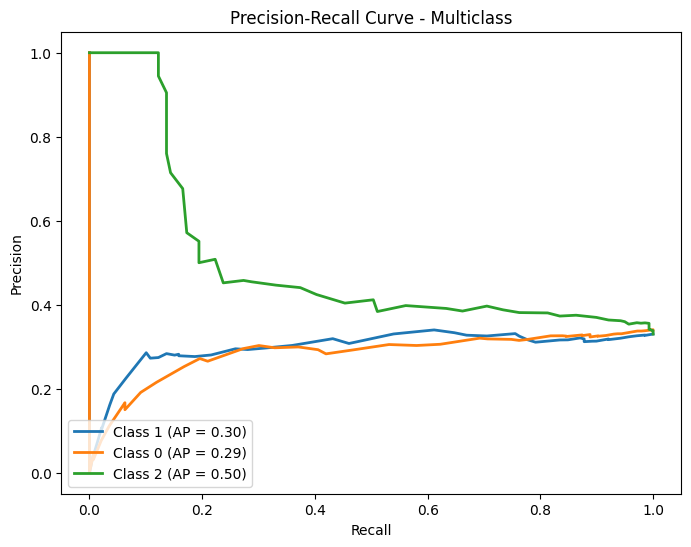

Macro-average Precision-Recall score: 0.36


In [67]:
y_test_bin = label_binarize(y_test, classes=df['Mental Health Condition'].unique())  # Binarize labels
y_pred_prob = rf.predict_proba(X_test)  # Get prediction probabilities

# Create dictionaries to hold precision, recall, and average precision
precision = {}
recall = {}
average_precision = {}

for i in range(len(df['Mental Health Condition'].unique())):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(df['Mental Health Condition'].unique())):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {df["Mental Health Condition"].unique()[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Multiclass')
plt.legend(loc='lower left')
plt.show()

# Macro-average Precision-Recall score
macro_avg_precision = sum(average_precision.values()) / len(average_precision)
print(f"Macro-average Precision-Recall score: {macro_avg_precision:.2f}")

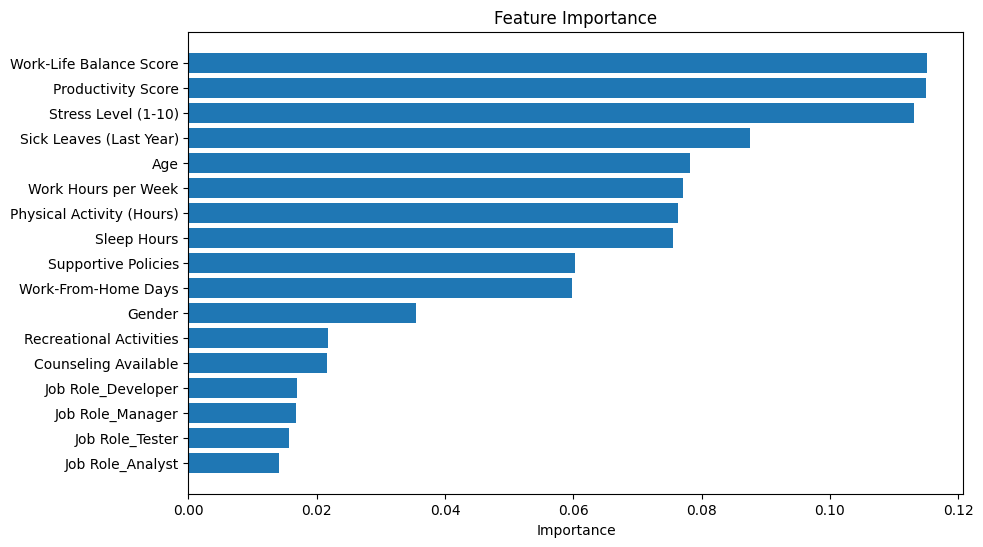

In [68]:
importances = rf.feature_importances_  # Get feature importances
indices = importances.argsort()  # Get indices of features sorted by importance

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])  # Label y-axis with feature names
plt.xlabel('Importance')
plt.show()

PREPROCESSING

In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Display the numerical columns to be scaled
print("Numerical Columns to be scaled:", numerical_cols)

# 2. Standardization (Z-score normalization): scales features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
df_scaled_standard = df.copy()
df_scaled_standard[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Standardized Data: ", df_scaled_standard.head())

Numerical Columns to be scaled: Index(['Age', 'Gender', 'Work Hours per Week', 'Counseling Available',
       'Work-From-Home Days', 'Stress Level (1-10)',
       'Physical Activity (Hours)', 'Supportive Policies', 'Sleep Hours',
       'Work-Life Balance Score', 'Sick Leaves (Last Year)',
       'Recreational Activities', 'Productivity Score',
       'Mental Health Condition'],
      dtype='object')
Standardized Data:          Age    Gender  Work Hours per Week  Counseling Available  \
0  0.000000 -1.227858         4.477001e+00             -1.016308   
1  0.519363 -1.227858         1.015122e-15              0.983954   
2  0.000000 -1.227858         1.015122e-15              0.983954   
3  0.000000  1.195577         1.015122e-15              0.983954   
4  0.149999 -1.227858         1.015122e-15              0.983954   

   Work-From-Home Days  Stress Level (1-10)  Physical Activity (Hours)  \
0            -0.849977             1.977310                  -1.242102   
1            -0.270

In [70]:

# Binning 'Age' into categories (you can adjust bins as per your use case)
age_bins = [18, 30, 40, 50, 60, 100]  # Define bins (you can adjust)
age_labels = ['18-30', '31-40', '41-50', '51-60', '60+']
df['Age Binned'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Binning 'Work Hours per Week' into categories (example bins)
work_hours_bins = [0, 30, 40, 50, 100]  # Define bins
work_hours_labels = ['<30 hours', '30-40 hours', '40-50 hours', '50+ hours']
df['Work Hours Binned'] = pd.cut(df['Work Hours per Week'], bins=work_hours_bins, labels=work_hours_labels, right=False)

# Binning 'Stress Level (1-10)' into categories (example bins)
stress_bins = [1, 3, 5, 7, 10]  # Define bins
stress_labels = ['Low Stress', 'Moderate Stress', 'High Stress', 'Very High Stress']
df['Stress Level Binned'] = pd.cut(df['Stress Level (1-10)'], bins=stress_bins, labels=stress_labels, right=False)

# Binning 'Sleep Hours' into categories (example bins)
sleep_bins = [0, 6, 8, 12]  # Define bins
sleep_labels = ['Less than 6 hours', '6-8 hours', 'More than 8 hours']
df['Sleep Hours Binned'] = pd.cut(df['Sleep Hours'], bins=sleep_bins, labels=sleep_labels, right=False)

# Binning 'Sick Leaves (Last Year)' into categories (example bins)
sick_leave_bins = [0, 5, 10, 30]  # Define bins
sick_leave_labels = ['0-5 days', '6-10 days', '10+ days']
df['Sick Leaves Binned'] = pd.cut(df['Sick Leaves (Last Year)'], bins=sick_leave_bins, labels=sick_leave_labels, right=False)

# Display the DataFrame with newly created binned columns
print(df[['Age', 'Age Binned', 'Work Hours per Week', 'Work Hours Binned', 
          'Stress Level (1-10)', 'Stress Level Binned', 'Sleep Hours', 'Sleep Hours Binned', 
          'Sick Leaves (Last Year)', 'Sick Leaves Binned']].head())


         Age Age Binned  Work Hours per Week Work Hours Binned  \
0  40.781697      41-50            120.00000               NaN   
1  45.000000      41-50             57.32573         50+ hours   
2  40.781697      41-50             57.32573         50+ hours   
3  40.781697      41-50             57.32573         50+ hours   
4  42.000000      41-50             57.32573         50+ hours   

   Stress Level (1-10) Stress Level Binned  Sleep Hours Sleep Hours Binned  \
0                 11.0                 NaN     1.000000  Less than 6 hours   
1                  9.8    Very High Stress     6.258807          6-8 hours   
2                  9.0    Very High Stress     6.258807          6-8 hours   
3                  1.0          Low Stress     4.600000  Less than 6 hours   
4                  8.4    Very High Stress     6.258807          6-8 hours   

   Sick Leaves (Last Year) Sick Leaves Binned  
0                      7.0          6-10 days  
1                      1.0           0

In [71]:

# One-hot encoding 
df_encoded = pd.get_dummies(df, columns=[
    'Age Binned', 
    'Work Hours Binned', 
    'Stress Level Binned', 
    'Sleep Hours Binned', 
    'Sick Leaves Binned'
])

# Display the encoded dataframe
print(df_encoded.head())


         Age  Gender  Work Hours per Week  Counseling Available  \
0  40.781697       0            120.00000                     0   
1  45.000000       0             57.32573                     1   
2  40.781697       0             57.32573                     1   
3  40.781697       2             57.32573                     1   
4  42.000000       0             57.32573                     1   

   Work-From-Home Days  Stress Level (1-10)  Physical Activity (Hours)  \
0                  1.0                 11.0                        1.0   
1                  2.0                  9.8                        1.0   
2                  4.0                  9.0                        1.0   
3                  1.0                  1.0                       10.0   
4                  5.0                  8.4                        1.0   

   Supportive Policies  Sleep Hours  Work-Life Balance Score  ...  \
0                  2.0     1.000000                      2.9  ...   
1             

In [72]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   2102 non-null   float64
 1   Gender                                2102 non-null   int64  
 2   Work Hours per Week                   2102 non-null   float64
 3   Counseling Available                  2102 non-null   int64  
 4   Work-From-Home Days                   2102 non-null   float64
 5   Stress Level (1-10)                   2102 non-null   float64
 6   Physical Activity (Hours)             2102 non-null   float64
 7   Supportive Policies                   2102 non-null   float64
 8   Sleep Hours                           2102 non-null   float64
 9   Work-Life Balance Score               2102 non-null   float64
 10  Sick Leaves (Last Year)               2102 non-null   float64
 11  Recreational Acti

In [73]:
df_encoded.head()

,Age,Gender,Work Hours per Week,Counseling Available,Work-From-Home Days,Stress Level (1-10),Physical Activity (Hours),Supportive Policies,Sleep Hours,Work-Life Balance Score,...,Stress Level Binned_Low Stress,Stress Level Binned_Moderate Stress,Stress Level Binned_High Stress,Stress Level Binned_Very High Stress,Sleep Hours Binned_Less than 6 hours,Sleep Hours Binned_6-8 hours,Sleep Hours Binned_More than 8 hours,Sick Leaves Binned_0-5 days,Sick Leaves Binned_6-10 days,Sick Leaves Binned_10+ days
0,40.781697,0,120.00000,0,1.0,11.0,1.0,2.0,1.000000,2.9,...,False,False,False,False,True,False,False,False,True,False
1,45.000000,0,57.32573,1,2.0,9.8,1.0,3.0,6.258807,2.5,...,False,False,False,True,False,True,False,True,False,False
2,40.781697,0,57.32573,1,4.0,9.0,1.0,4.0,6.258807,8.8,...,False,False,False,True,False,True,False,False,False,True
3,40.781697,2,57.32573,1,1.0,1.0,10.0,5.0,4.600000,5.7,...,True,False,False,False,True,False,False,True,False,False
4,42.000000,0,57.32573,1,5.0,8.4,1.0,5.0,6.258807,2.3,...,False,False,False,True,False,True,False,True,False,False


In [74]:
# Convert the boolean columns to integer (0 or 1)
df_encoded = df_encoded.astype(int)

In [75]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   2102 non-null   int32
 1   Gender                                2102 non-null   int32
 2   Work Hours per Week                   2102 non-null   int32
 3   Counseling Available                  2102 non-null   int32
 4   Work-From-Home Days                   2102 non-null   int32
 5   Stress Level (1-10)                   2102 non-null   int32
 6   Physical Activity (Hours)             2102 non-null   int32
 7   Supportive Policies                   2102 non-null   int32
 8   Sleep Hours                           2102 non-null   int32
 9   Work-Life Balance Score               2102 non-null   int32
 10  Sick Leaves (Last Year)               2102 non-null   int32
 11  Recreational Activities               2102 

In [76]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature
Q1 = df[['Work Hours per Week', 'Stress Level (1-10)', 'Sleep Hours']].quantile(0.25)
Q3 = df[['Work Hours per Week', 'Stress Level (1-10)', 'Sleep Hours']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[~((df[['Work Hours per Week', 'Stress Level (1-10)', 'Sleep Hours']] < lower_bound) | 
                  (df[['Work Hours per Week', 'Stress Level (1-10)', 'Sleep Hours']] > upper_bound)).any(axis=1)]

print("Cleaned Dataframe:")
print(df_cleaned.shape)

Cleaned Dataframe:
(695, 23)


MODEL TRAINING AFTER PREPROCESSING

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_encoded is the dataset you've processed

# Step 1: Define features (X) and target (y)
X = df_encoded.drop(columns=['Mental Health Condition'])  # Drop the target variable
y = df_encoded['Mental Health Condition']  # Target variable

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
rf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Optional: Print more detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 43.94%
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.38      0.41       143
           1       0.46      0.54      0.50       139
           2       0.41      0.40      0.40       139

    accuracy                           0.44       421
   macro avg       0.44      0.44      0.44       421
weighted avg       0.44      0.44      0.44       421



VISULAIZATION AFTER PREPROCESSING

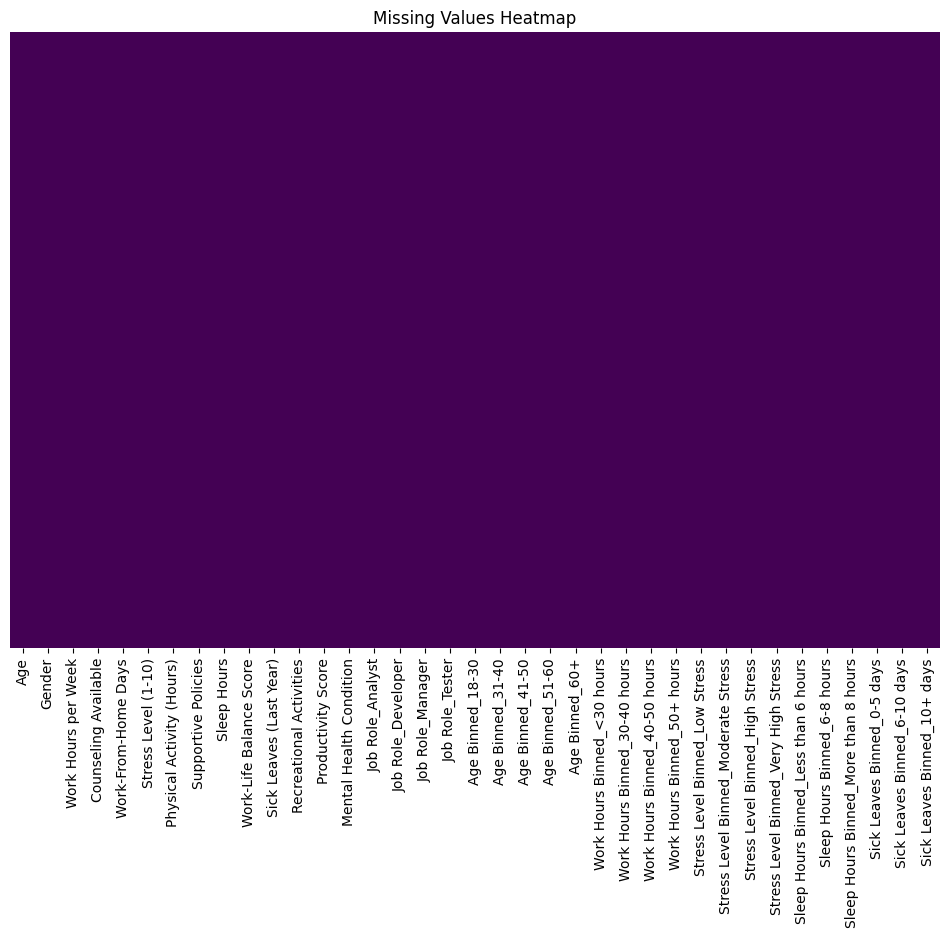

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(df_encoded.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Missing Values Heatmap')
plt.show()

Correlation Matrix:
                                           Age    Gender  Work Hours per Week  \
Age                                   1.000000 -0.031045             0.007692   
Gender                               -0.031045  1.000000            -0.012466   
Work Hours per Week                   0.007692 -0.012466             1.000000   
Counseling Available                  0.013384  0.007810             0.031784   
Work-From-Home Days                   0.011433  0.047773             0.036674   
Stress Level (1-10)                  -0.013169  0.000557             0.246072   
Physical Activity (Hours)             0.022201  0.000058             0.009059   
Supportive Policies                  -0.035160  0.004492             0.021594   
Sleep Hours                           0.003870  0.010398            -0.339299   
Work-Life Balance Score               0.038695  0.057038            -0.019712   
Sick Leaves (Last Year)               0.017260 -0.021767             0.026009   
Recreati

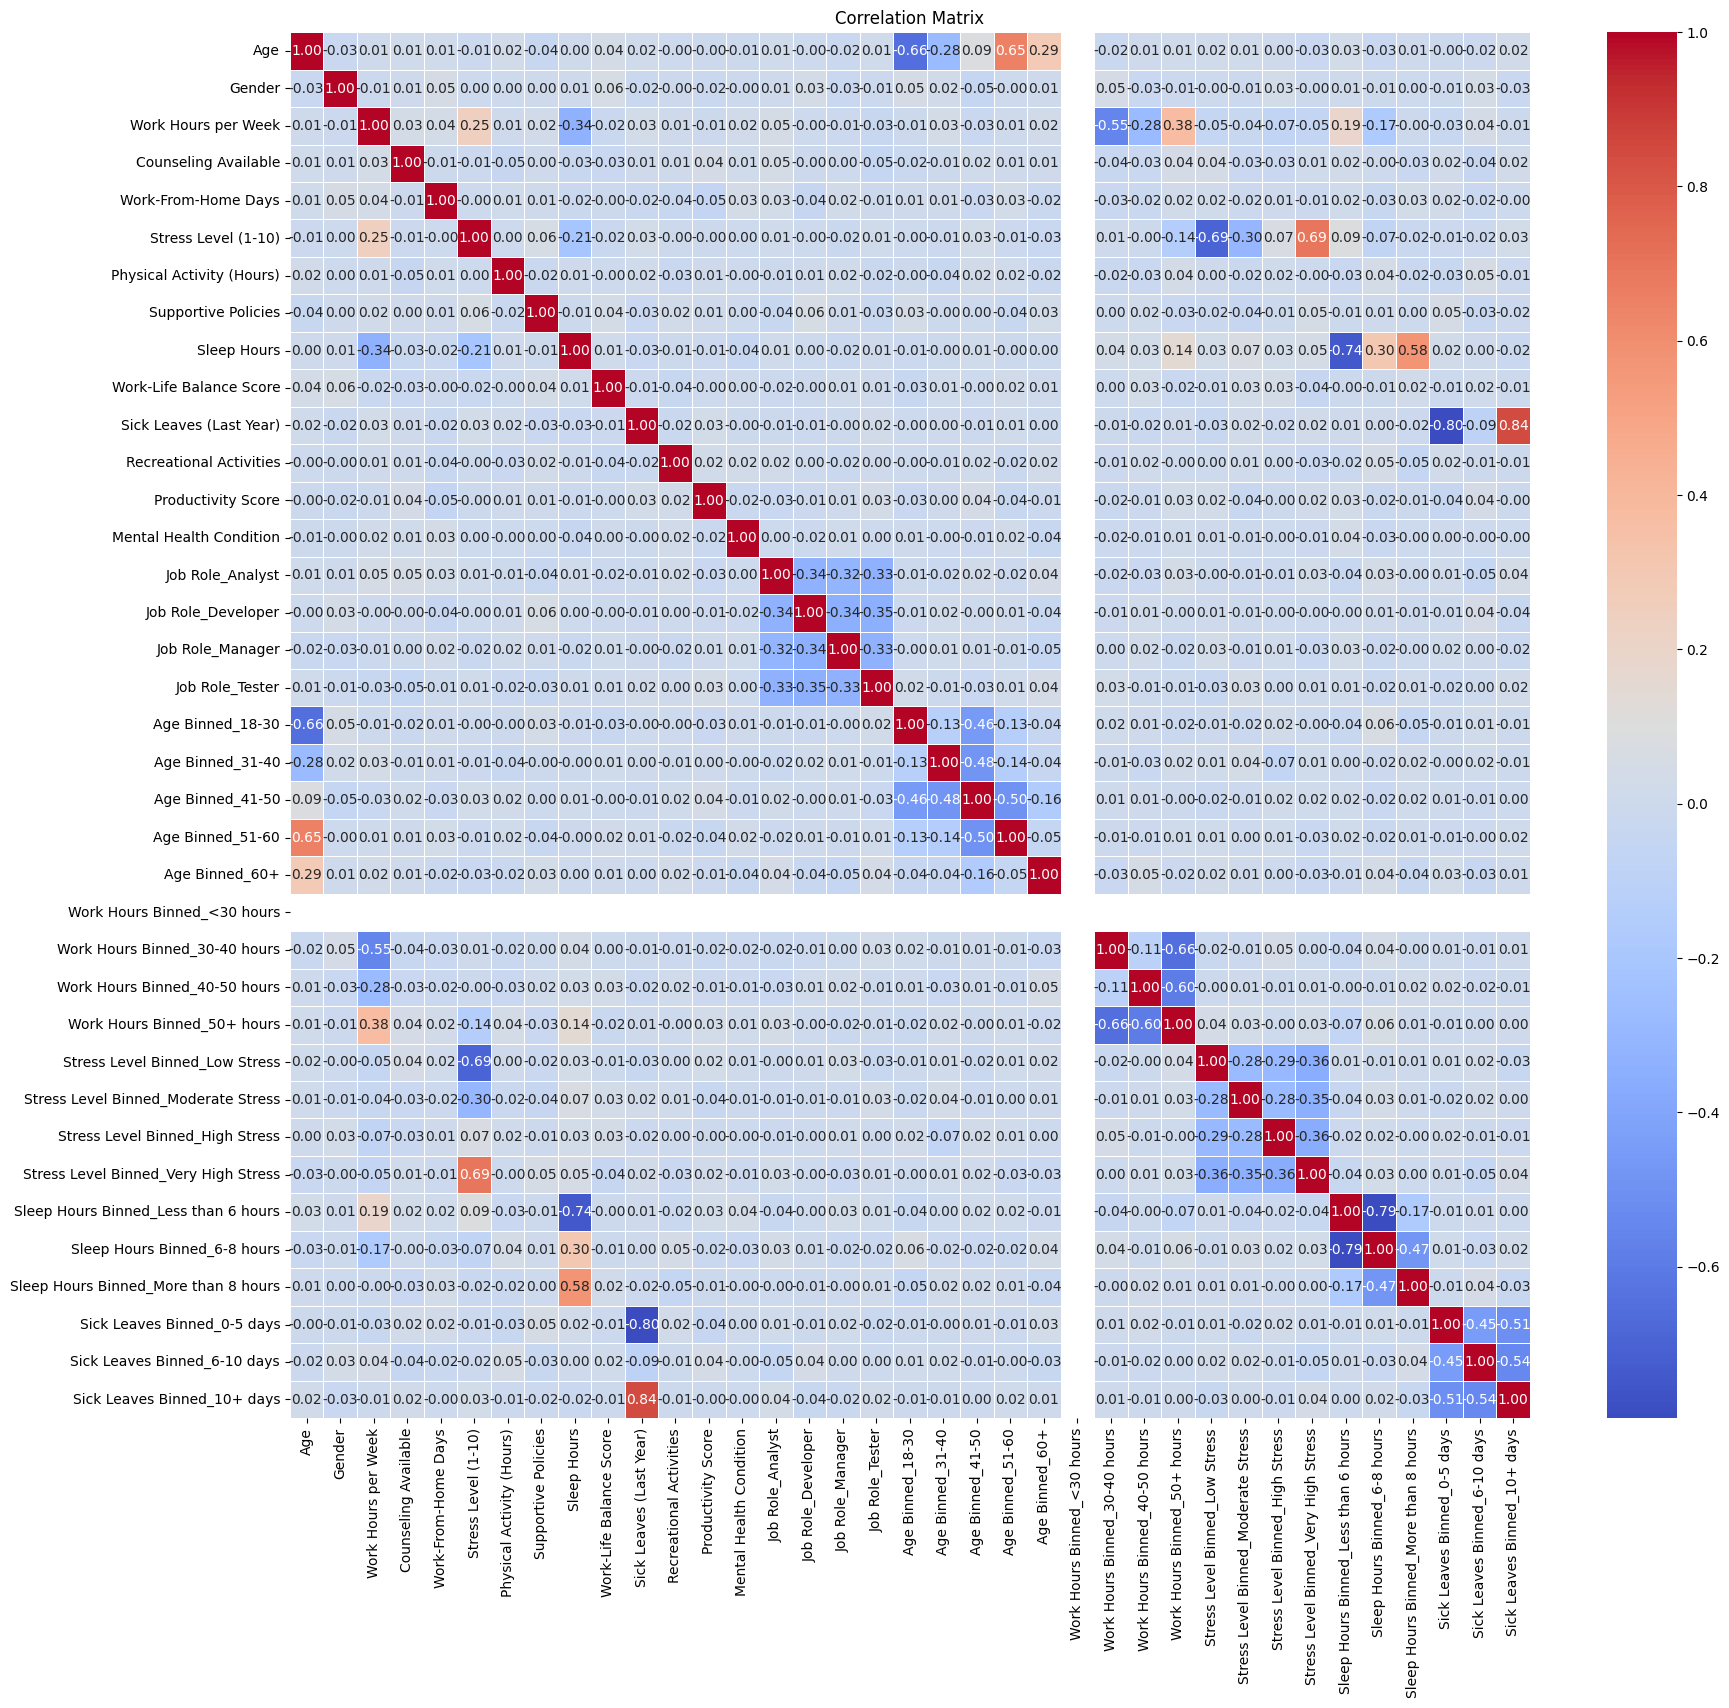

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


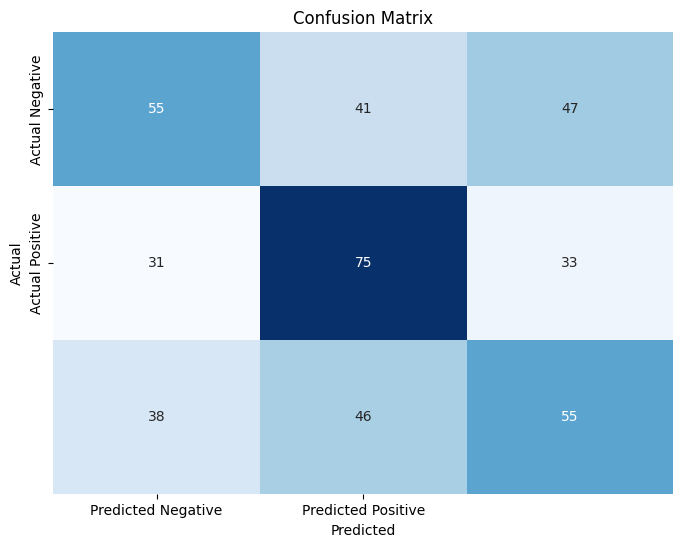

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

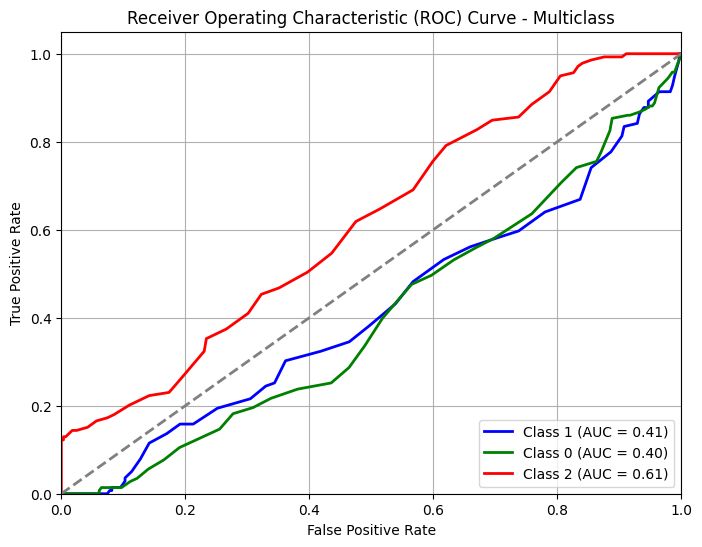

In [81]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming your target column is 'Mental Health Condition' and features are all the rest of the columns except for the target
# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=df_encoded['Mental Health Condition'].unique())

# Get the predicted probabilities for all classes
y_pred_prob = rf.predict_proba(X_test)

# Number of classes
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Calculate ROC and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

# Define colors for each class
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Adjust if more classes
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {df_encoded["Mental Health Condition"].unique()[i]} (AUC = {roc_auc[i]:.2f})')

# Add diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()


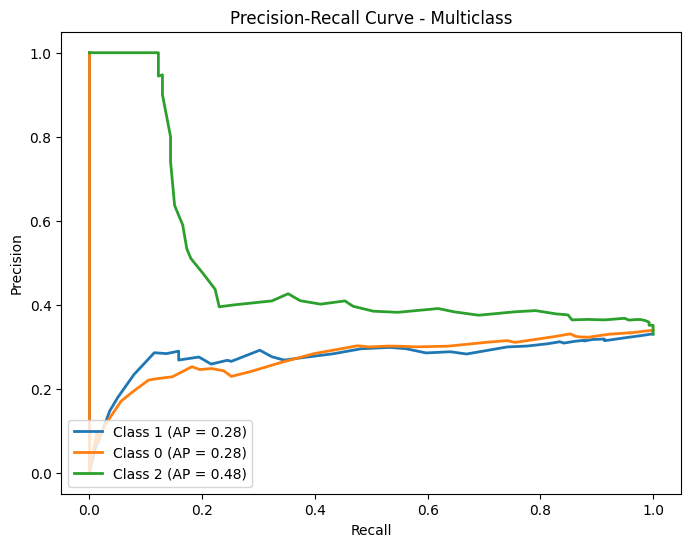

Macro-average Precision-Recall score: 0.35


In [82]:
y_test_bin = label_binarize(y_test, classes=df['Mental Health Condition'].unique())  # Binarize labels
y_pred_prob = rf.predict_proba(X_test)  # Get prediction probabilities

# Create dictionaries to hold precision, recall, and average precision
precision = {}
recall = {}
average_precision = {}

for i in range(len(df['Mental Health Condition'].unique())):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(df['Mental Health Condition'].unique())):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {df["Mental Health Condition"].unique()[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Multiclass')
plt.legend(loc='lower left')
plt.show()

# Macro-average Precision-Recall score
macro_avg_precision = sum(average_precision.values()) / len(average_precision)
print(f"Macro-average Precision-Recall score: {macro_avg_precision:.2f}")

In [83]:
df_encoded.shape

(2102, 37)

KeyError: 'Age Binned_18-30'

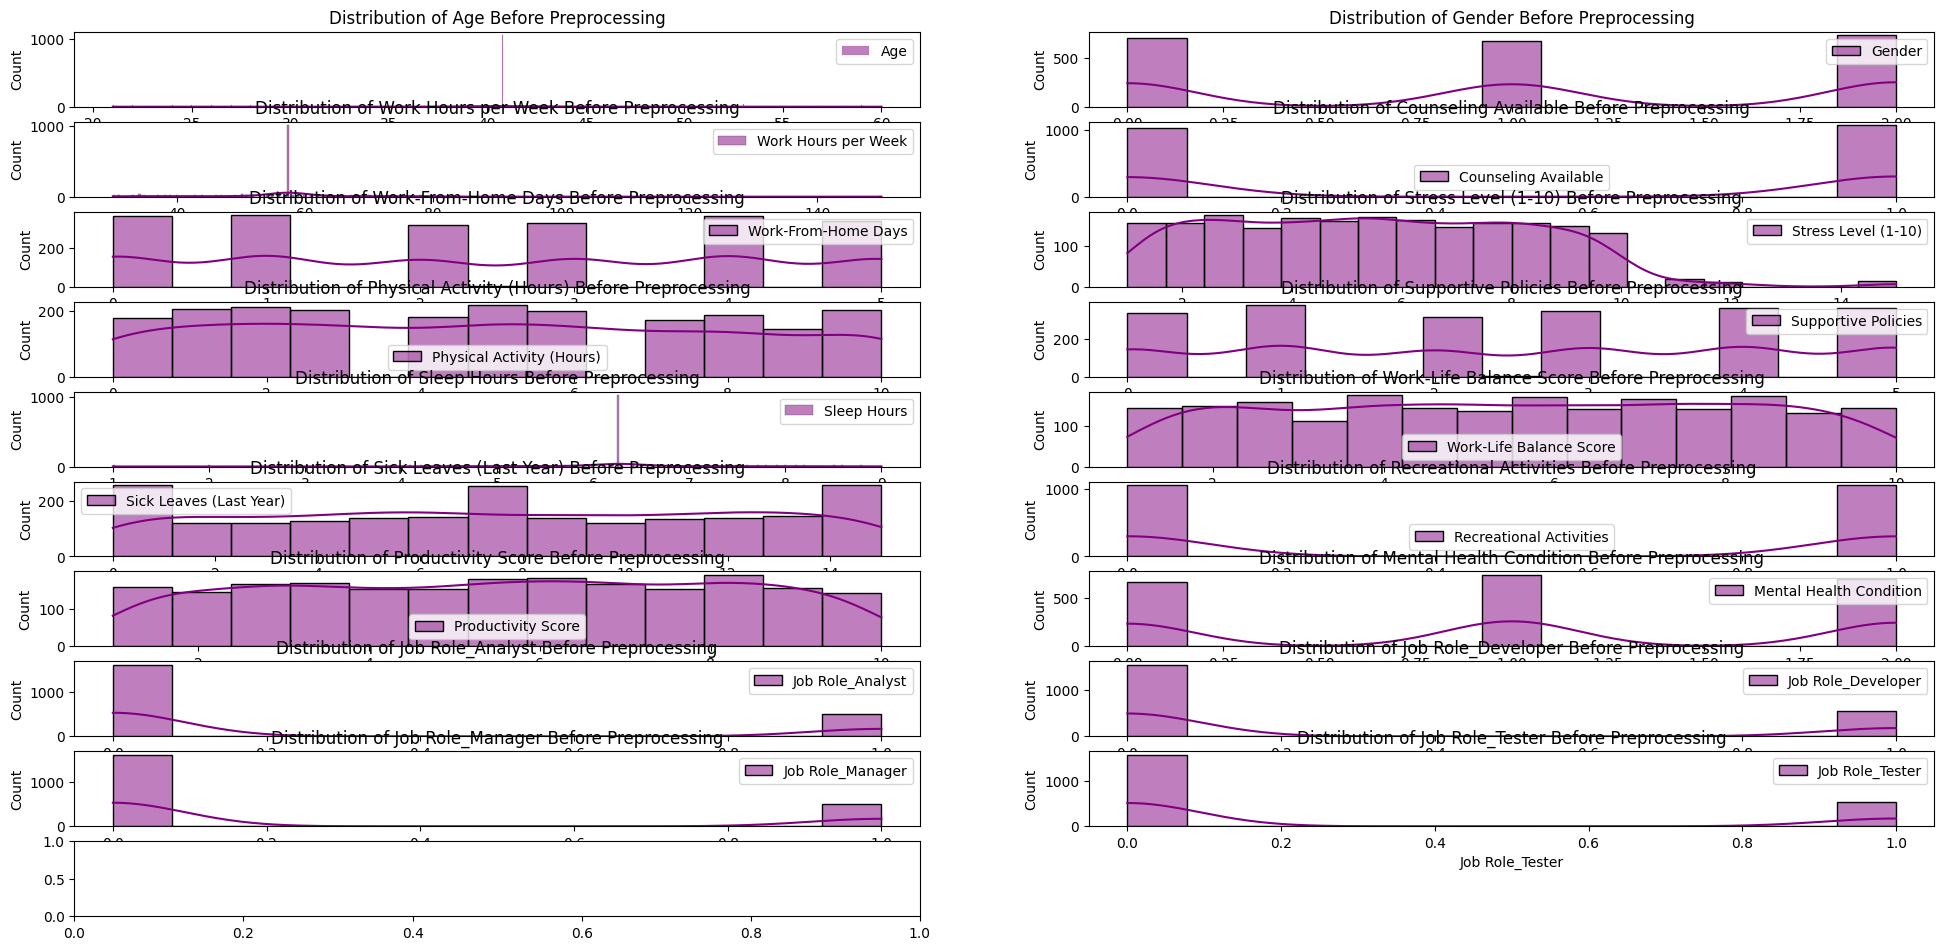

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df_encoded.select_dtypes(include=['number']).columns

# Set the size of the figure
plt.figure(figsize=(24, 22))

# Loop through numeric columns and plot their distribution
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i)  # Arrange the subplots
    sns.histplot(df[col], kde=True, color="purple", label=col)
    plt.title(f"Distribution of {col} Before Preprocessing")
    plt.legend()

# Adjust the layout to make it neat
plt.tight_layout()
plt.show()


DASHBOARD

In [86]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [87]:
pip install dash

In [89]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import base64

# Initialize the Dash app
app = dash.Dash(__name__)

# Function to encode images to base64
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode()
    return f"data:image/png;base64,{encoded_image}"

# Paths to images
MISSING_BEFORE_PREPROCESSING = "C:/Users/asus/Documents/FDS PROJECT/MISSINGVALUES.png"
DUPLICATE_VALUES = "C:/Users/asus/Documents/FDS PROJECT/DUPLICATEVALUES.png"
BALANCED_DATASET = "C:/Users/asus/Documents/FDS PROJECT/CLASS DISTRIBUTION.png"
DITRIBUTION_BEFORE_PREPROCESSING = "C:/Users/asus/Documents/FDS PROJECT/DITRIBUTIONOFALLFEATURES.png"
BOX_PLOT = "C:/Users/asus/Documents/FDS PROJECT/BOXPLOT.png"
CORELATION_BEFORE_PREPROCESSING = "C:/Users/asus/Documents/FDS PROJECT/CORELATION.png"
FEATURE_IMPORTANCE = "C:/Users/asus/Documents/FDS PROJECT/FEATUREIMPORTANCE.png"
CONFUSIONMATRIX_BEFORE_PREPROCESSING = "C:/Users/asus/Documents/FDS PROJECT/CONFUSIONMATRIXBEFOREPREPROCESSING.png"
ROC_CURVE_BEFORE_PREPROCESSING = "C:/Users/asus/Documents/FDS PROJECT/ROCB4PREPROCESSING.png"
PRCURVE_BEFORE = "C:/Users/asus/Documents/FDS PROJECT/PRB4PREPROCESSING.png"
MISSING_AFTER = "C:/Users/asus/Documents/FDS PROJECT/MISSINGAFTERPREPROCESSING.png"
CORELATION_AFTER_PREPROCESSING = "C:/Users/asus/Documents/FDS PROJECT/CORELATIONMATRIXAFTERPREPROCESSING.png"
CONFUSIONMATRIX_AFTER_PREPROCESSING = "C:/Users/asus/Documents/FDS PROJECT/CONFUSIONMATRIXAFTER.png"
DISTRIBUTION_AFTER_PREPROCESSING = "C:/Users/asus/Documents/FDS PROJECT/DISTRIBUTIONAFTER.png"
ROC_CURVE_AFTER_PREPROCESSING = "C:/Users/asus/Documents/FDS PROJECT/ROCAFTER.png"
PRCURVE_AFTER = "C:/Users/asus/Documents/FDS PROJECT/PRAFTER.png"

# Encode images to base64
encoded_images = {
    "Missing Values": (encode_image(MISSING_BEFORE_PREPROCESSING), encode_image(MISSING_AFTER)),
    "Duplicate Values": (encode_image(DUPLICATE_VALUES), None),  # No after image
    "Balanced Dataset": (encode_image(BALANCED_DATASET), None),  # No after image
    "Distribution of All Features": (encode_image(DITRIBUTION_BEFORE_PREPROCESSING), encode_image(DISTRIBUTION_AFTER_PREPROCESSING)),
    "Box Plot": (encode_image(BOX_PLOT), None),  # No after image
    "Correlation Heatmap": (encode_image(CORELATION_BEFORE_PREPROCESSING), encode_image(CORELATION_AFTER_PREPROCESSING)),
    "Feature Importance": (encode_image(FEATURE_IMPORTANCE), None),  # No after image
    "Confusion Matrix": (encode_image(CONFUSIONMATRIX_BEFORE_PREPROCESSING), encode_image(CONFUSIONMATRIX_AFTER_PREPROCESSING)),
    "ROC Curve": (encode_image(ROC_CURVE_BEFORE_PREPROCESSING), encode_image(ROC_CURVE_AFTER_PREPROCESSING)),
    "PR Curve": (encode_image(PRCURVE_BEFORE), encode_image(PRCURVE_AFTER)),
}

# Layout dynamically generated
app.layout = html.Div(
    style={'backgroundColor': '#f7f7f7', 'fontFamily': 'Arial, sans-serif', 'padding': '20px'},
    children=[
        html.H1("Interactive Before and After Preprocessing Dashboard", style={'textAlign': 'center', 'color': '#3d3d3d'}),
        
        # Dropdown to select which chart/image to display
        dcc.Dropdown(
            id='image-dropdown',
            options=[{'label': key, 'value': key} for key in encoded_images.keys()],
            value='Missing Values',
            style={'width': '50%', 'margin': '0 auto'}
        ),
        
        # Radio items to toggle between before and after
        dcc.RadioItems(
            id='before-after-toggle',
            options=[
                {'label': 'Before Preprocessing', 'value': 'before'},
                {'label': 'After Preprocessing', 'value': 'after'}
            ],
            value='before',
            style={'textAlign': 'center', 'marginTop': '20px'}
        ),
        
        # Image container
        html.Div(
            id='image-container',
            style={'display': 'flex', 'justifyContent': 'center', 'marginTop': '20px'}
        )
    ]
)

# Callback to update the image based on dropdown and radio selection
@app.callback(
    Output('image-container', 'children'),
    [Input('image-dropdown', 'value'),
     Input('before-after-toggle', 'value')]
)
def update_image(selected_image, before_after):
    before_image, after_image = encoded_images[selected_image]
    
    # Return the selected image based on "Before" or "After" toggle
    if before_after == 'before' and before_image:
        return html.Img(src=before_image, style={'width': '40%', 'height': 'auto', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)'})
    elif before_after == 'after' and after_image:
        return html.Img(src=after_image, style={'width': '40%', 'height': 'auto', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)'})
    else:
        return html.Div("No data available for the selected option", style={'color': 'red', 'textAlign': 'center'})

# Start the app
if __name__ == '__main__':
    app.run_server(debug=True)
